In [226]:
""""Data cleaning/visualization for ODF Fire Data Sonification.
Myriah Hodgson, MUS 479, 5/14/24"""

# Imports for working with the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Wildfires

Wildfires in Oregon, and the west coast in general, put elements of our ecological systems at great risk. Impacting humans, animals, and the land, these wildfires can be both devastating and deadly. How can we interpret data that describes these wildfires, both visually and sonically, to investigate some of the ways that these wildfires occur, spread, and are controlled?

In this project I will be examining this [data](https://data.oregon.gov/stories/s/92y3-mdk3) from the Oregon Department of Forestry, which includes information about wildfires from 2000-2022.

Initially, let's read in the data from a downloaded csv file and parse through our column names to see what might be interesting to examine:

In [227]:
# Load the data, look through the column names to see what is interesting to plot.
fires = pd.read_csv('ODF_FireData.csv')
column_names = list(fires.columns.values)
column_names

fires

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,...,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
1,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,...,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
2,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,...,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133
3,63735,STAT,2002,NOA,West Oregon,Philomath,02-551001-03,WREN,A,0.01,...,Lvl 1 Fire Season Only,07/06/2002 01:01:00 PM,07/06/2002 01:04:00 PM,07/06/2002 01:02:00 PM,07/06/2002 01:07:00 PM,07/07/2002 09:16:00 AM,07/28/2002 10:08:00 AM,55,551,001
4,68019,STAT,2003,NOA,West Oregon,Dallas,03-552013-04,Ritner Creek,A,0.01,...,Lvl 3 Restricted Shutdown,08/22/2003 04:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 09:30:00 AM,08/22/2003 04:12:00 PM,09/04/2003 09:39:00 AM,55,552,013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,124548,STAT,2021,EOA,Walker Range - WRFPA,Crescent,21-991258-21,Road 2430,B,0.75,...,Does Not Apply - Eastern OR,06/26/2021 04:00:00 PM,06/26/2021 04:58:00 PM,06/26/2021 04:45:00 PM,06/26/2021 09:58:00 PM,07/01/2021 12:00:00 AM,10/02/2021 03:08:00 PM,99,991,258
23486,132141,STAT,2022,SOA,Western Lane,Veneta,22-781066-23,Spruce Path,A,0.01,...,Lvl 1 Fire Season Only,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,09/13/2022 12:14:00 PM,09/13/2022 12:00:00 AM,09/19/2022 10:09:00 AM,78,781,066
23487,124065,STAT,2021,EOA,Northeast Oregon,Pendleton,21-973052-21,Bone Canyon,C,67.43,...,Does Not Apply - Eastern OR,06/13/2021 05:22:00 PM,06/14/2021 12:45:00 PM,06/14/2021 12:45:00 PM,06/17/2021 05:10:00 PM,06/14/2021 12:00:00 AM,09/24/2021 01:48:00 PM,97,973,052
23488,131292,STAT,2022,EOA,Northeast Oregon,Pendleton,22-973014-23,Milepost 231,A,0.10,...,Does Not Apply - Eastern OR,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,08/19/2022 04:41:00 PM,08/19/2022 12:00:00 AM,11/08/2022 11:34:00 AM,97,973,014


# Land Type and Time Until Control
Looking at the column headers of the dataset, something interesting to investigate might be the relationships between times: when the fires were ignited, discovered, reported, and controlled. How does this relate to the other variables?

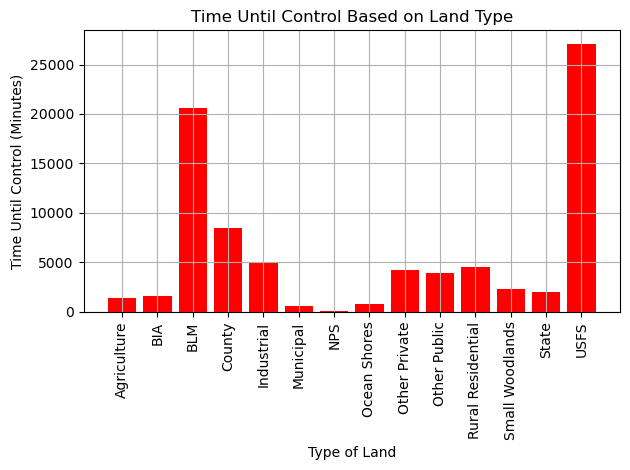

In [228]:
# Take the times of ignition, discovery, report, and control - make sure they are converted to datetime format.
ign_t = pd.to_datetime(fires['Ign_DateTime'], format='mixed')
discover_t = pd.to_datetime(fires['Discover_DateTime'], format='mixed')
report_t = pd.to_datetime(fires['ReportDateTime'], format='mixed')
control_t = pd.to_datetime(fires['Control_DateTime'], format='mixed')

# The time from reported until controlled
reported_till_controlled = control_t - report_t

# What type of land is it?
owned_type = fires['FO_LandOwnType']

# Create a dictionary with the amound of time until controlled, as well as the type of land. Convert this into a pandas df.
type = {'DiscoveryTime': reported_till_controlled, 'TypeOwned': owned_type}
df = pd.DataFrame(type).groupby("TypeOwned").mean()

# We will drop the rows (now row because of groupby) where TypeOwned is not given.
df = df.drop(index='ERROR: #N/A')

# The index of data frame is the type owned, because that is what we grouped by
t_owned = df.index

# Convert to workable units
d_time = df['DiscoveryTime'].dt.total_seconds() / 60 # taking total seconds and dividing by 60 gives minutes as unit
df['DiscoveryTime'] = np.round(d_time, 2) # make it so that the dataframe also has minutes as the unit

"""Does the land type make a difference on how long, on average, it took to control the fire (time from discovery until control)?
We can plot and take a look at it, for now ... """

plt.bar(t_owned, d_time, color='red')
plt.xticks(rotation=90)
plt.xlabel("Type of Land")
plt.ylabel("Time Until Control (Minutes)")
plt.title("Time Until Control Based on Land Type")

plt.tight_layout(); plt.grid()

"""It may be interesting to make a sonic histogram of this data, or something similar."""

# Let's save both the pd dataframe as a csv, and the histogram as a png
df.to_csv('control_time.csv')
plt.savefig('TimeUntilControl.png')


Above, I have created a histogram of the various types of land surveyed in the dataset, and the amount of time it took to control the fires of this type on average (calculated by the time the fire was controlled minus the time the fire was reported).

There appear to be two clear peaks in the data: the BLM (Bureau of Land Management) lands and the USFS lands (US Department of Agricultural Forest Services). Why does it take longer to put out fires in these types of lands? Perhaps it is due to either the fact that the land is not residential or privately owned, and thus has less human capital associated with it. Additionally, perhaps these types of lands are less developed than the others listed, which potentially equates to more trees and brush for fires, as well as less ease in access for those containing the fires.

# Human vs Lightning
Something else that may be interesting to investigate is the distinction between wildfires which were started by humans, and those which were started by lightning. Do fires that occur naturally (by lightning) typically have different relationships with the other features present in our dataset? Do they typically cause a larger amount of damage?

Let's visually and sonically investigate this in two ways:

(1) How these relationships may differ over time (grouping the data by year)

(2) How overall, locationally, these relationships may differ (plot of longitude vs latitude)

Specifically, I am currently interesting the relationship between fire type and damages caused. We can quantify this by looking at the 'Estimated Total Acreage' (burned) by each fire.

In [229]:
"""We can manipulate the original csv file dataframe into smaller pandas dataframes, in order to clarify and trim for the intent of our sonification."""

# Split datasets into what was caused by humans vs what was caused by lightning
human = fires[fires['HumanOrLightning'] == 'Human']
lightning = fires[fires['HumanOrLightning'] == 'Lightning']

# Make smaller dataframes, grouping by the year and summing the estimated total sum of acres for that year
# We can also keep track of the longitudes for these two groups! This would be interesting to use for panning. 

# Estimates of total acres burned for both types of fires:
human1 = human.groupby("FireYear")['EstTotalAcres'].sum()
light1 = lightning.groupby("FireYear")['EstTotalAcres'].sum()

# Average longitudes each year for both types of fires:
h_long = human.groupby("FireYear")['Long_DD'].mean()
l_long = lightning.groupby("FireYear")['Long_DD'].mean()

# Create a new df with these two series; can load into a new csv file that we will sonify
dict = {'Human': human1, 'Lightning': light1, 'Human Longitude': h_long, 'Lightning Longitude': l_long} 
acres = pd.DataFrame(data=dict, index=human1.index)

# Send the new df to a csv in order to sonify !
acres.to_csv('yearly.csv')

acres

,Human,Lightning,Human Longitude,Lightning Longitude
FireYear,,,,
2000,16060.46,97278.51,-122.565732,-120.753435
2001,9746.79,66247.44,-122.538755,-121.294708
2002,7470.37,1251026.20,-122.699145,-121.031359
2003,14654.94,108736.48,-122.722267,-121.292586
2004,6182.56,236.42,-122.702389,-120.554859
2005,11565.14,59689.17,-122.525322,-121.023161
2006,1696.63,118680.91,-122.752982,-120.748812
2007,52357.36,319260.37,-122.594713,-120.873914
2008,2791.76,14426.03,-122.720953,-121.479445


Above, I divided the original dataset based on cause of the fire, grouped by the year, took sums for each year of the total acreage burned, and averaged the longitude value for each year. This will allow us to sonify the two groups (human vs lightning), taking note of the total damages caused by each (in terms of estimated acreage burned), as well as the typical location of these fires each year. Now, let's plot it:

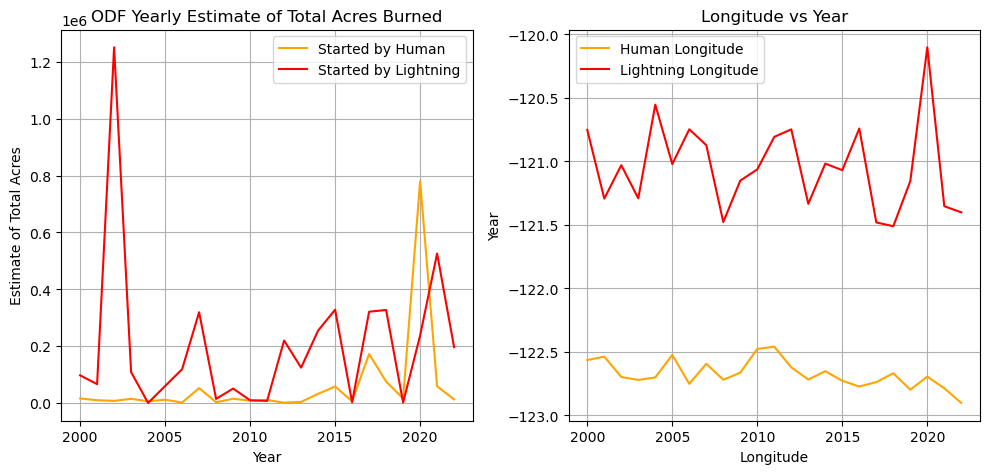

In [230]:
# Create a line plot for both types of fire - started by lightning vs started by human
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))

ax0.plot(human1.index, human1, color='orange', label='Started by Human')
ax0.plot(light1.index, light1, color='red', label='Started by Lightning')
ax0.legend()
ax0.set_title("ODF Yearly Estimate of Total Acres Burned")
ax0.set_ylabel("Estimate of Total Acres")
ax0.grid()
ax0.set_xlabel("Year")
#plt.savefig('ODF Yearly Estimate of Total Acres Burned.pdf')

ax1.plot(human1.index, h_long, color='orange', label="Human Longitude")
ax1.plot(human1.index, l_long, color='red', label="Lightning Longitude")
ax1.grid()
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Year')
ax1.set_title("Longitude vs Year")
ax1.legend()

plt.tight_layout()
plt.savefig('YearlyBurnedandLongitude.png')
#acres

Above are two line graphs that visually demonstrate how Oregon wildfires have behaved from 2000 to 2022. The first graph depicts the amount of acreage burned by each type of fire, whereas the second shows the average location where both types of fires occured during these years. Looking at the graphs, it appears that wildfires started by lightning typically burned more acreage, and ofter occured further east than those which were started by humans. 

Next, what if we do not necessarily want to investigate wildfires by the year they occured. What if we solely want to visualize, and sonify, location and damage?

To do this, we can:

(1) Look at the dataframes created which are separated by lightning or human

(2) Keep the columns with latitude and longitude - we are going to create a scatterplot of these (which hopefully mimics the real life location)

(3) Also make an array for the EstTotalAcres burned for both groups

(4) Plot it! Make a scatterplot, with the size of each data point relative of the EstTotalAcres which were burned; color the points according to lightning or human
    

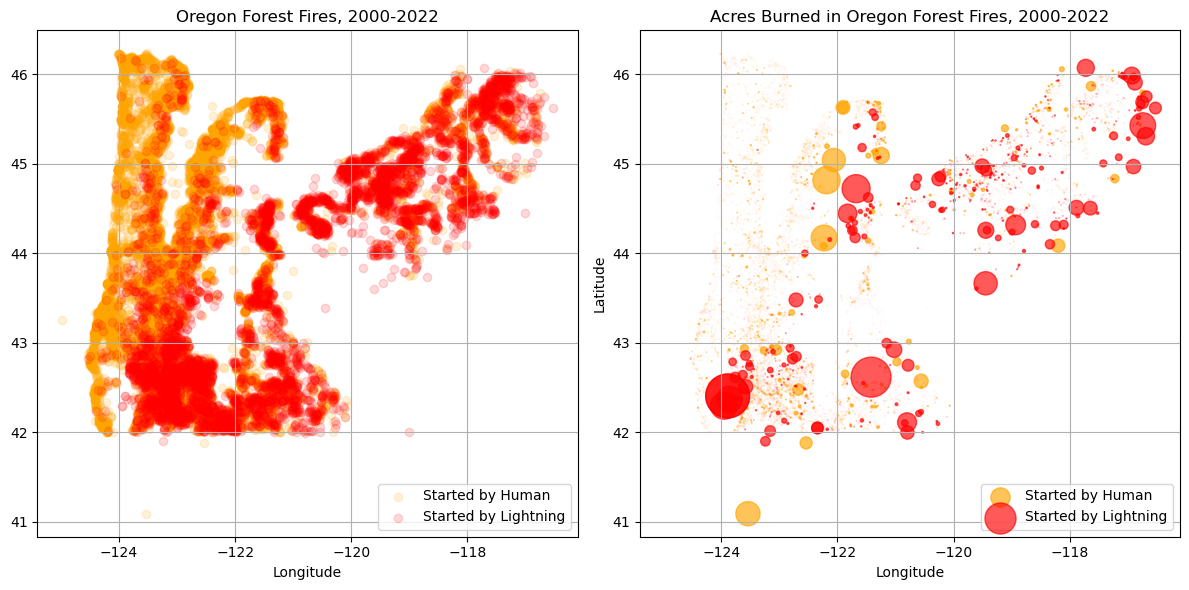

In [231]:
# human and lightning are the names of those dataframes... when they are NOT yet grouped by the year. 
# Let's make arrays of the latitude and longitude values for those arrays, as well as EstTotalAcres burned!
human_long = human['Long_DD']
human_lat = human['Lat_DD']
human_acres = human['EstTotalAcres']
human_discover = pd.to_datetime(human['Discover_DateTime'], format='mixed')

light_long = lightning['Long_DD']
light_lat = lightning['Lat_DD']
light_acres = lightning['EstTotalAcres']
light_discover = pd.to_datetime(lightning['Discover_DateTime'], format='mixed')

# Let's make more Dataframes, to make other csv files. We will be able to use these csv files when working with Kyma.
dict_human = {'Human Longitude': human_long, 'Human Latitude': human_lat, 'Human Acres Burned': human_acres, 'Human Discovery Time':human_discover,}
dict_lightning = {'Lightning Longitude': light_long, 'Lightning Latitude': light_lat, 'Lightning Acres Burned': light_acres, 'Lightning Discovery Time': light_discover}

human_location = pd.DataFrame(data=dict_human)
lightning_location = pd.DataFrame(data=dict_lightning)

# Let's plot it! We can make two different representations: One where acres burned affects size, one where it does not.
# In different iterations of this project, it could be interesting to mark specific fires that we want to emphasize (specific marker for a point, could auditorily mark it as well)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

ax0.set_title('Oregon Forest Fires, 2000-2022')
ax0.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax0.scatter(human_long, human_lat, c='orange', alpha=0.15, label='Started by Human')
ax0.scatter(light_long, light_lat, c='red', alpha=0.15, label='Started by Lightning')

ax1.set_title('Acres Burned in Oregon Forest Fires, 2000-2022')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.scatter(human_long, human_lat, c='orange', s=human_acres*(0.002), alpha=0.65, label='Started by Human')
ax1.scatter(light_long, light_lat, c='red', s=light_acres*(0.002), alpha=0.65, label='Started by Lightning')

ax0.legend(); ax1.legend()
ax0.grid(); ax1.grid()
plt.tight_layout()

plt.savefig('FireLocation.png')

# There are a lot of NaN entries in our dataframe. We need to fill those in order to use Kyma.
human_location = human_location.set_index('Human Discovery Time') # Set index by time
human_location = human_location.sort_index()
human_location = human_location.ffill() # Forward fill values that are NaN
human_location = human_location.reset_index(drop=True)
human_location = human_location.sort_values('Human Longitude') # Sort values by longitude (we will sonify left to right)

human_location.to_csv('human_location.csv')


lightning_location = lightning_location.set_index('Lightning Discovery Time') # Set index by time
lightning_location = lightning_location.sort_index()
lightning_location = lightning_location.ffill() # Forward fill values that are NaN
lightning_location = lightning_location.reset_index(drop=True)
lightning_location = lightning_location.sort_values('Lightning Longitude') # Sort values by longitude (we will sonify left to right)

lightning_location.to_csv('lightning_location.csv')

Visually looking at the fires in our dataset based on coordinate location, it is clear that most fires started by humans occur further west. However, looking at the figure at right, it is interesting to note that a majority of these fires are quite small. The largest human started fires appear to be in central Oregon. There also appear to be more large-scale wildfires started by lightning than there are of those started by humans. It is interesting to see such a large concentration of high-damage wildfires started by lightning in Southwest Oregon, as the average across these years is further east than that of those started by humans. Visually, though, there appears to be a much wider longitudinal spread of these high-damage lightning-started wildfires.